In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
#将字符通过tfidf向量化
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

In [5]:
import os 
os.chdir('朴素贝叶斯算法')

In [6]:
train=pd.read_csv('data/train.csv',sep='\t')
train.head(5)

,message,label
0,Aight text me when you're back at mu and I'll ...,ham
1,I cant wait to see you! How were the photos we...,ham
2,Kothi print out marandratha.,ham
3,Its just the effect of irritation. Just ignore it,ham
4,Kallis wont bat in 2nd innings.,ham


In [7]:
le=LabelEncoder()
tfidfvec=TfidfVectorizer(min_df=0.01)

In [8]:
y=le.fit_transform(train['label'])
x=tfidfvec.fit_transform(train['message'])

In [9]:
mnb=MultinomialNB()
mnb.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
test=pd.read_csv('data/test.csv',sep='\t')
test.head(5)

,message,label
0,"Funny fact Nobody teaches volcanoes 2 erupt, t...",ham
1,I sent my scores to sophas and i had to do sec...,ham
2,We know someone who you know that fancies you....,spam
3,Only if you promise your getting out as SOON a...,ham
4,Congratulations ur awarded either å£500 of CD ...,spam


In [11]:
y_test=le.transform(test['label'])
x_test=tfidfvec.transform(test['message'])

In [20]:
pred=mnb.predict(x_test)
pred_prob=mnb.predict_proba(x_test)

准确率召回率评估

In [36]:
#评估指标的函数
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,roc_curve
def printScore(y_true,y_pred,y_pred_score):
    print('precision score is:%.2f'%(precision_score(y_true,y_pred)))
    print('recall score is:%.2f'%(recall_score(y_true,y_pred)))
    print('f1_score is:%.2f'%(f1_score(y_true,y_pred)))
    print('roc_auc_score is:%2.f'%(roc_auc_score(y_true,y_pred_score[:,1])))
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_score[:,1])
    plt.figure(1)
    plt.plot(fpr_rf,tpr_rf,label='Bayes')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')

precision score is:0.95
recall score is:0.72
f1_score is:0.82
roc_auc_score is: 1


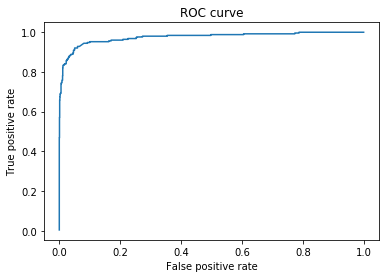

In [37]:
#评估指标
printScore(y_test,pred,pred_prob)

In [18]:
le.transform(['ham', 'spam'])

array([0, 1])